Analizzo il file: /Users/marcodonatiello/PycharmProjects/JupyterProject/data/processed/encoded/train_encoded.csv

--- 📊 STATISTICHE ETÀ ---
count    536370.000000
mean         49.806134
std          20.252339
min           0.000000
25%          35.000000
50%          51.000000
75%          66.000000
max         107.000000
Name: AGE_YRS, dtype: float64

Asimmetria (Skewness): -0.14
-> La distribuzione è abbastanza SIMMETRICA (Normale).


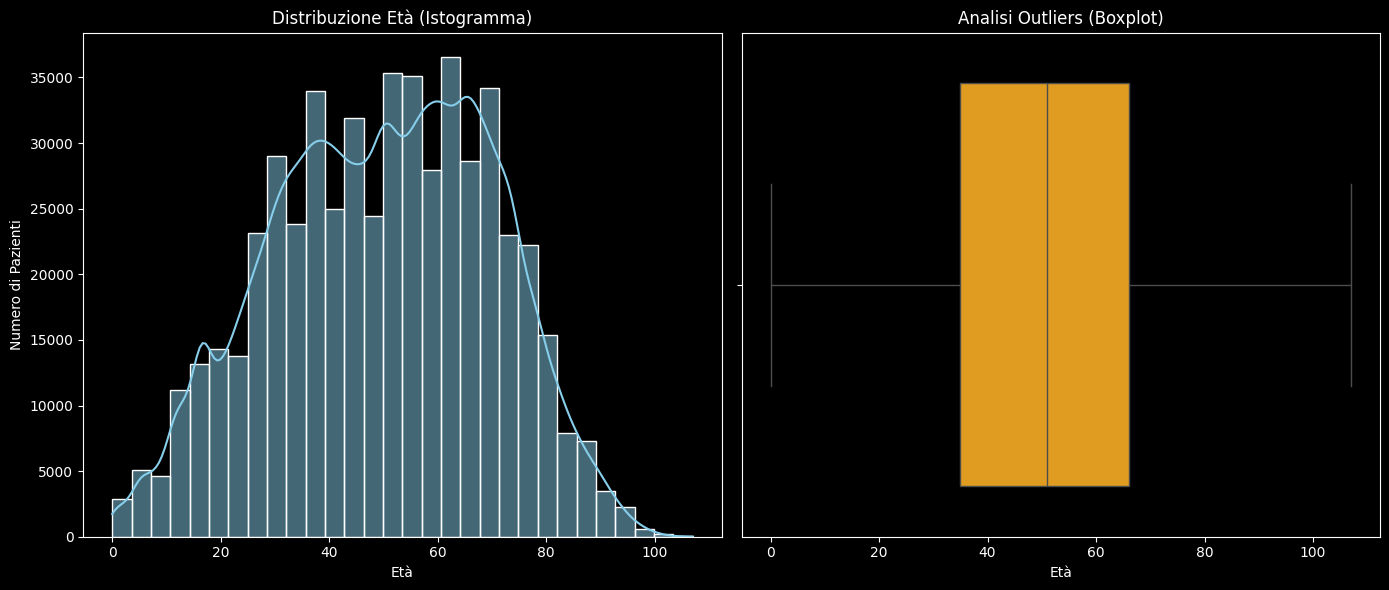

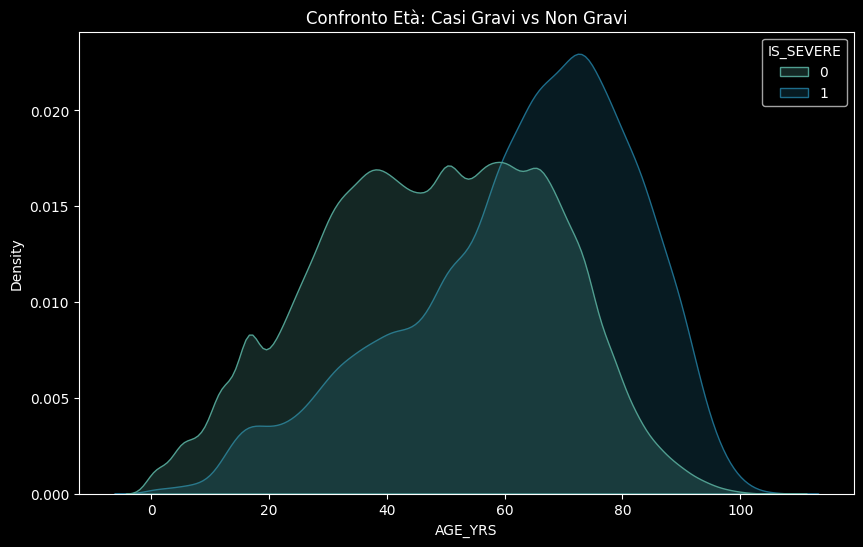

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- 1. CONFIGURAZIONE PERCORSI ---
# (Uso la stessa logica "intelligente" di prima per evitare errori)
CURRENT_DIR = os.getcwd()
if os.path.basename(CURRENT_DIR) in ["02_feature_engineering", "notebooks", "src"]:
    BASE_DIR = os.path.dirname(CURRENT_DIR)
else:
    BASE_DIR = CURRENT_DIR

DATA_DIR = os.path.join(BASE_DIR, 'dataset')
# Puoi usare 'train_final.csv' o 'train_encoded.csv', contengono la stessa età
FILE_PATH = os.path.join(DATA_DIR, 'train_encoded.csv')

if not os.path.exists(FILE_PATH):
    # Fallback se non hai ancora l'encoded
    FILE_PATH = os.path.join(DATA_DIR, 'train_final.csv')

print(f"Analizzo il file: {FILE_PATH}")
df = pd.read_csv(FILE_PATH)

# --- 2. STATISTICHE NUMERICHE ---
print("\n--- 📊 STATISTICHE ETÀ ---")
desc = df['AGE_YRS'].describe()
print(desc)

skewness = df['AGE_YRS'].skew()
print(f"\nAsimmetria (Skewness): {skewness:.2f}")
if -0.5 < skewness < 0.5:
    print("-> La distribuzione è abbastanza SIMMETRICA (Normale).")
elif skewness > 0.5:
    print("-> La distribuzione è sbilanciata a SINISTRA (tanti giovani, coda verso gli anziani).")
else:
    print("-> La distribuzione è sbilanciata a DESTRA (tanti anziani, coda verso i giovani).")

# --- 3. VISUALIZZAZIONE GRAFICA ---
plt.figure(figsize=(14, 6))

# GRAFICO A: Istogramma (La forma della distribuzione)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='AGE_YRS', kde=True, bins=30, color='skyblue')
plt.title('Distribuzione Età (Istogramma)')
plt.xlabel('Età')
plt.ylabel('Numero di Pazienti')

# GRAFICO B: Boxplot (Gli Outliers)
plt.subplot(1, 2, 2)
sns.boxplot(x=df['AGE_YRS'], color='orange')
plt.title('Analisi Outliers (Boxplot)')
plt.xlabel('Età')

plt.tight_layout()
plt.show()

# --- 4. ANALISI RISCHIO PER ETÀ (Bonus) ---
# Vediamo se l'età cambia tra casi Gravi (1) e Non Gravi (0)
if 'IS_SEVERE' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x='AGE_YRS', hue='IS_SEVERE', fill=True, common_norm=False, palette="crest")
    plt.title('Confronto Età: Casi Gravi vs Non Gravi')
    plt.show()